In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# a function that computes eigenvalues of a matrix
def eigenvalues(A):
    return np.linalg.eig(A)[0]

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


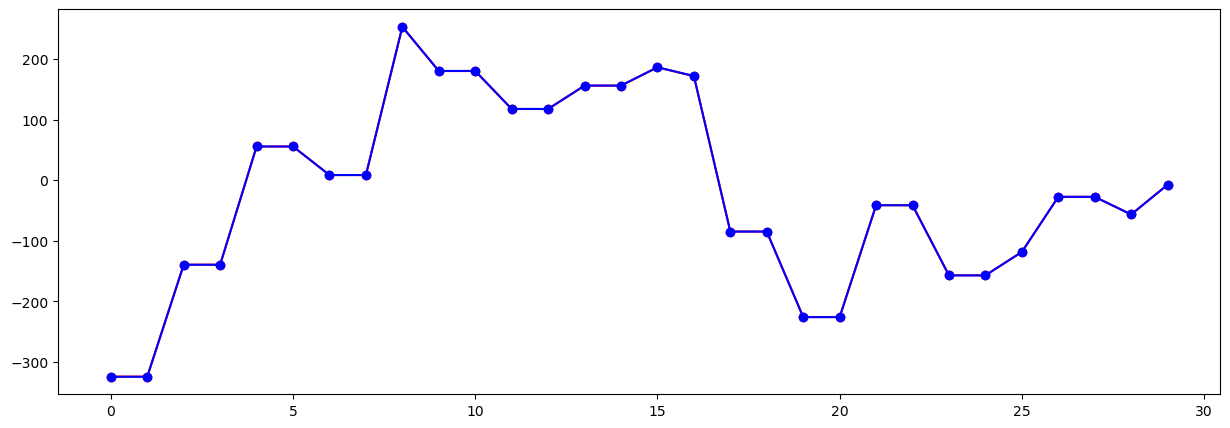

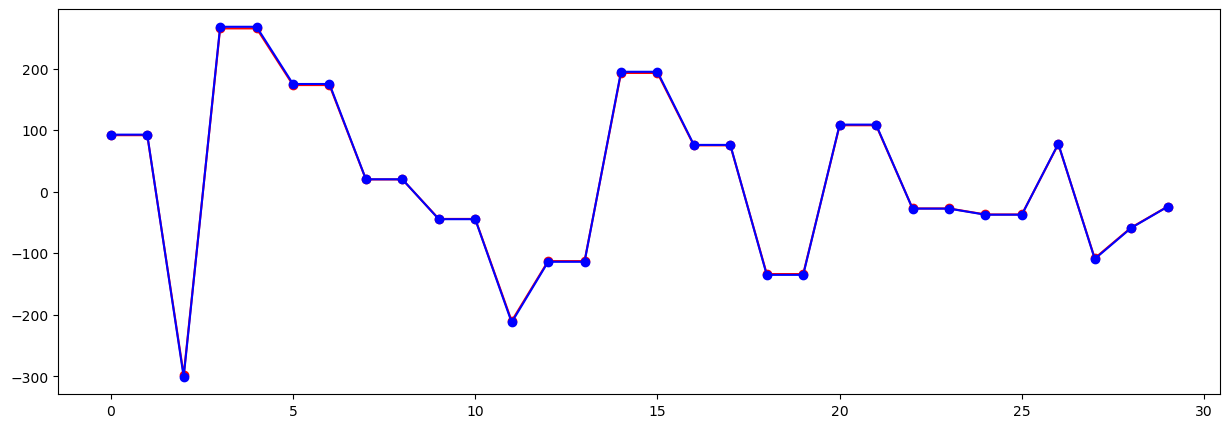

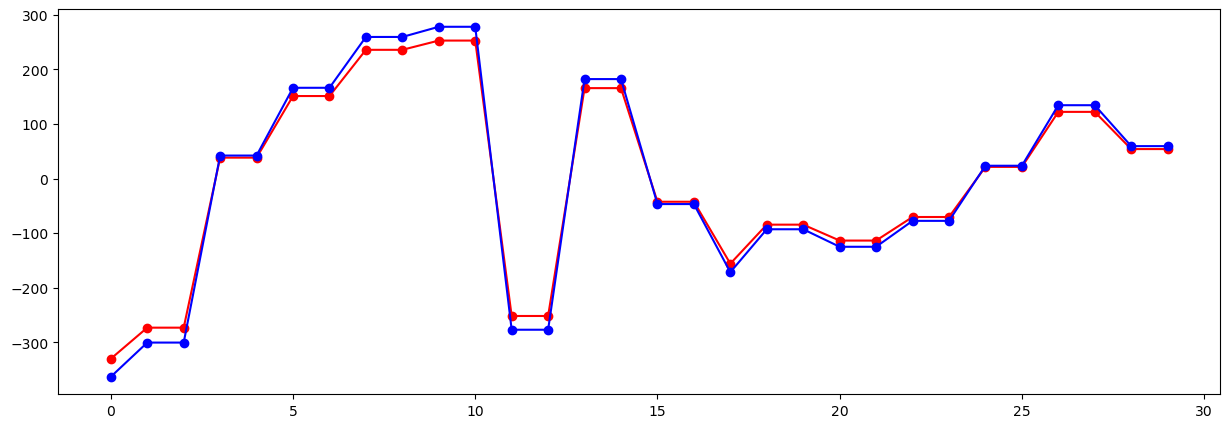

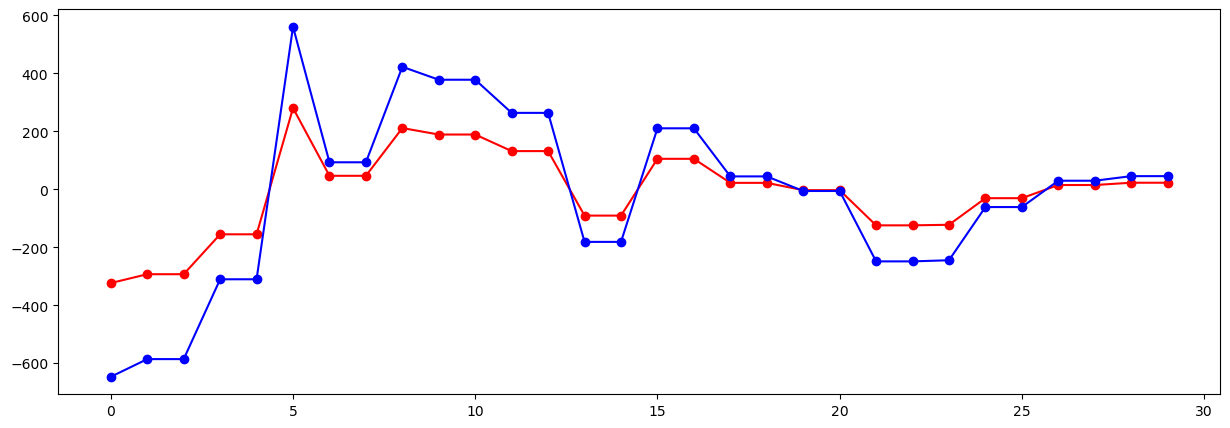

In [3]:
a = 100
eps_list = [0.001, 0.01, 0.1, 1]
n = 30
for eps in eps_list:
    A = np.random.randint(-a,a,(n,n))
    B = eps*A
    C = A+B
    lambda_A = eigenvalues(A)
    lambda_C = eigenvalues(C)
    # plot the eigenvalues
    plt.figure(figsize=(15,5))
    plt.plot(lambda_A, 'o-', color='red')
    plt.plot(lambda_C, 'o-', color='blue')
    plt.show()

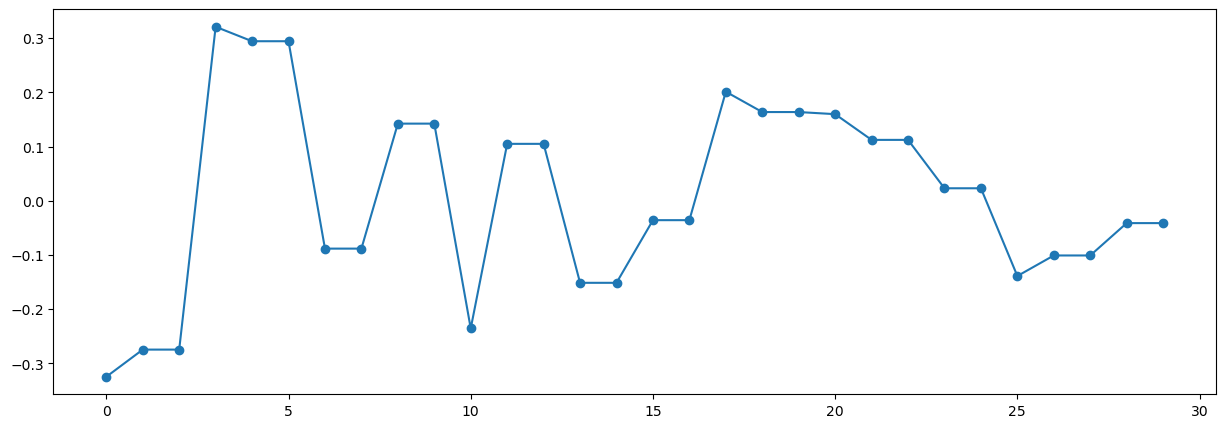

the average differennce for eps = 0.001 is (0.009266666666670649+0j)


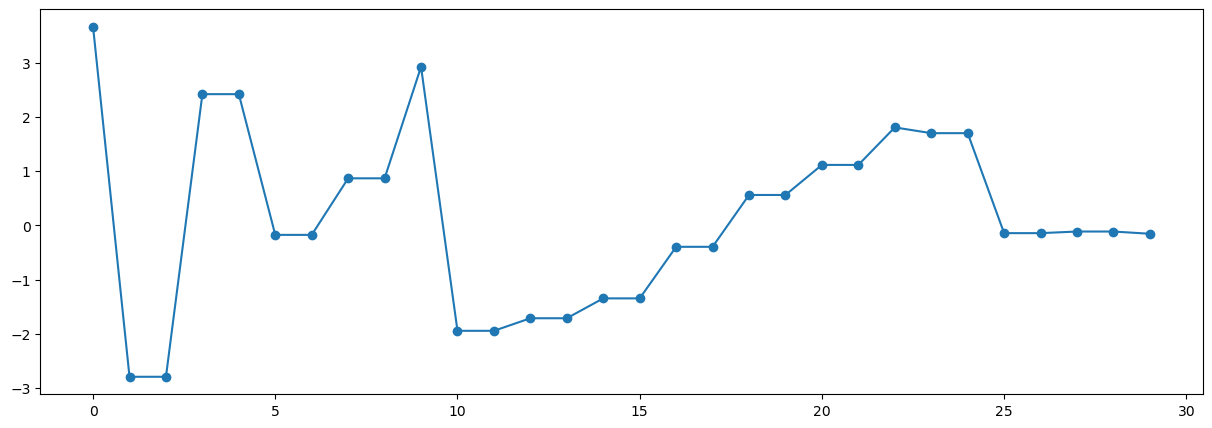

the average differennce for eps = 0.01 is (0.1436666666665854+0j)


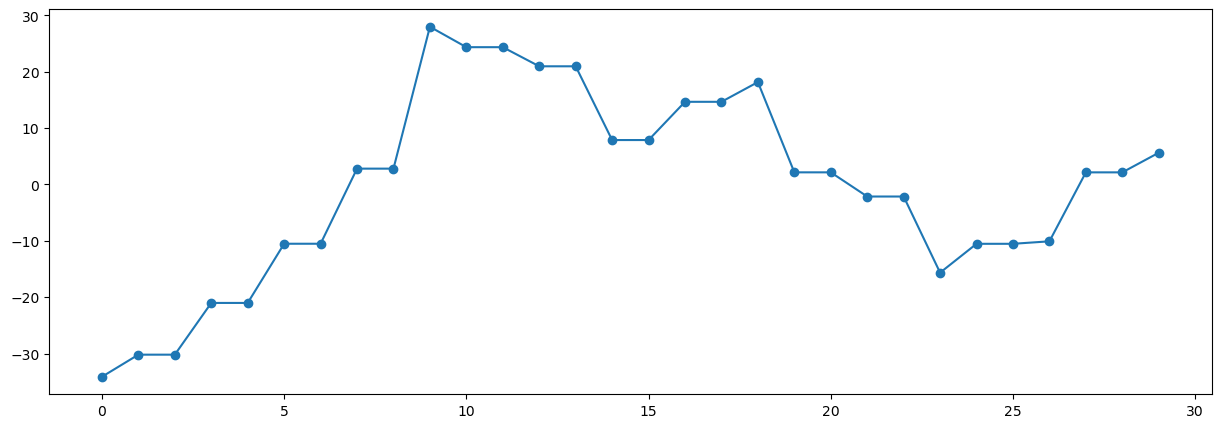

the average differennce for eps = 0.1 is (-0.22666666666656235+0j)


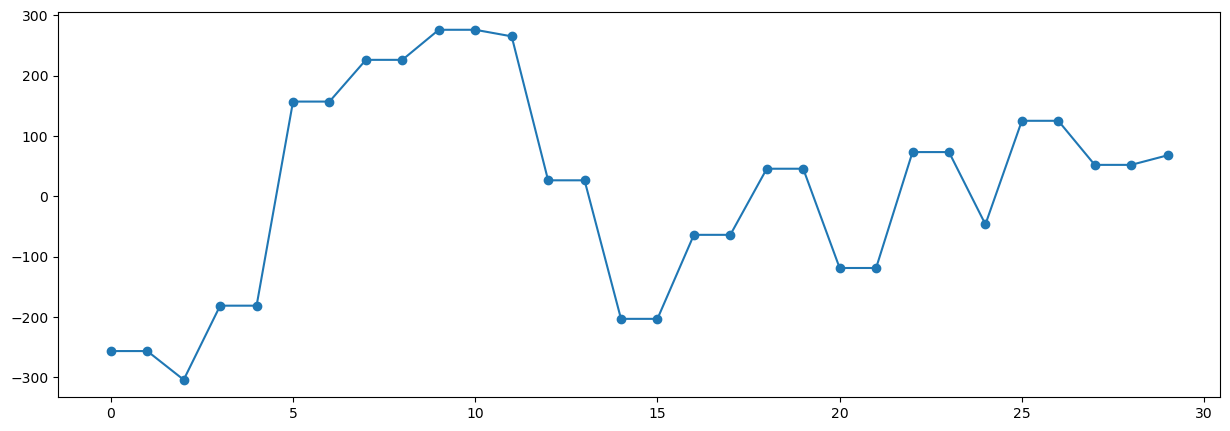

the average differennce for eps = 1 is (9.899999999999949+1.8947806286936005e-15j)


In [10]:
a = 100
eps_list = [0.001, 0.01, 0.1, 1]
n = 30
for eps in eps_list:
    A = np.random.randint(-a,a,(n,n))
    B = eps*A
    C = A+B
    lambda_A = eigenvalues(A)
    lambda_C = eigenvalues(C)
    # compute the difference between the eigenvalues
    diff = lambda_C - lambda_A
    # plot the eigenvalues
    plt.figure(figsize=(15,5))
    plt.plot(diff, 'o-')
    plt.show()
    print('the average differennce for eps =', eps, 'is', np.mean(diff))

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


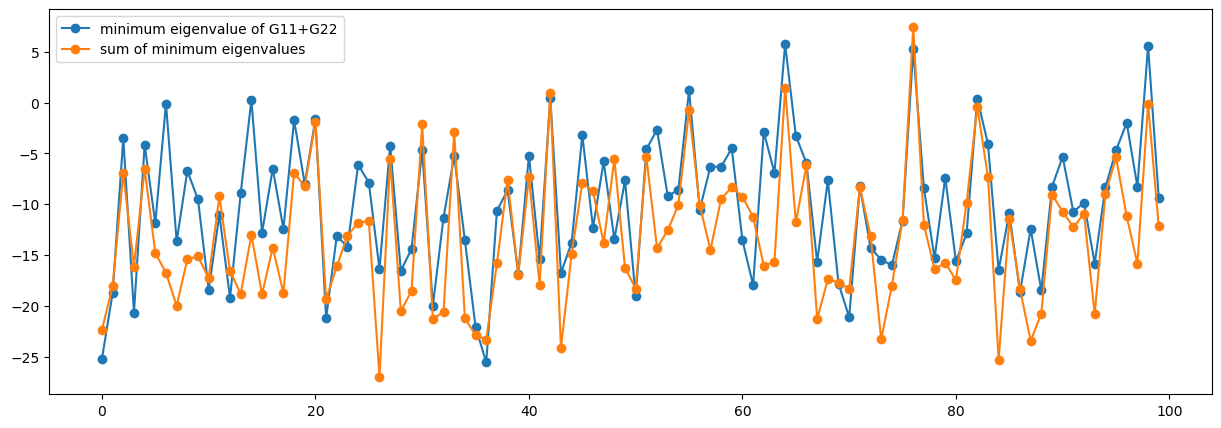

In [5]:
sum_mins = []
min_sum = []
cases_1 = []
cases_2 = []
n = 3
a = 10
for i in range(100):
    G11 = np.random.randint(-a,a,(n,n))
    G22 = np.random.randint(-a,a,(n,n))
    min_l_sum = min(eigenvalues(G11+G22))
    min_1 = min(eigenvalues(G11))
    min_2 = min(eigenvalues(G22))
    min_sum.append(min_l_sum)
    sum_mins.append(min_1+min_2)
    if min_l_sum < min_1 + min_2:
        cases_1.append(G11)
        cases_2.append(G22)

plt.figure(figsize=(15,5))
plt.plot(min_sum, 'o-', label='minimum eigenvalue of G11+G22')
plt.plot(sum_mins, 'o-', label='sum of minimum eigenvalues')
plt.legend()
plt.show()

In [112]:
print(cases_1[0])
print('\n')
print(cases_2[0])
print('\n')
print(cases_1[0]+cases_2[0])

[[ 6 -3  2]
 [-5 -4  7]
 [ 4  5 -6]]


[[ 8  0  8]
 [-7  8  9]
 [ 0 -2  9]]


[[ 14  -3  10]
 [-12   4  16]
 [  4   3   3]]


In [117]:
g11 = cases_1[0]
g22 = cases_2[0]
y_1 = min(eigenvalues(2*np.identity(n)+g11+g11.T))
y_2 = min(eigenvalues(2*np.identity(n)+g22+g22.T))
y_g = min(eigenvalues(2*np.identity(n)+g11+g11.T+g22+g22.T))
print(str(y_g)+' > '+str(y_1+y_2-2))

-18.65334193742479>-20.792792308409222


In [26]:
print(len(cases_2))

212


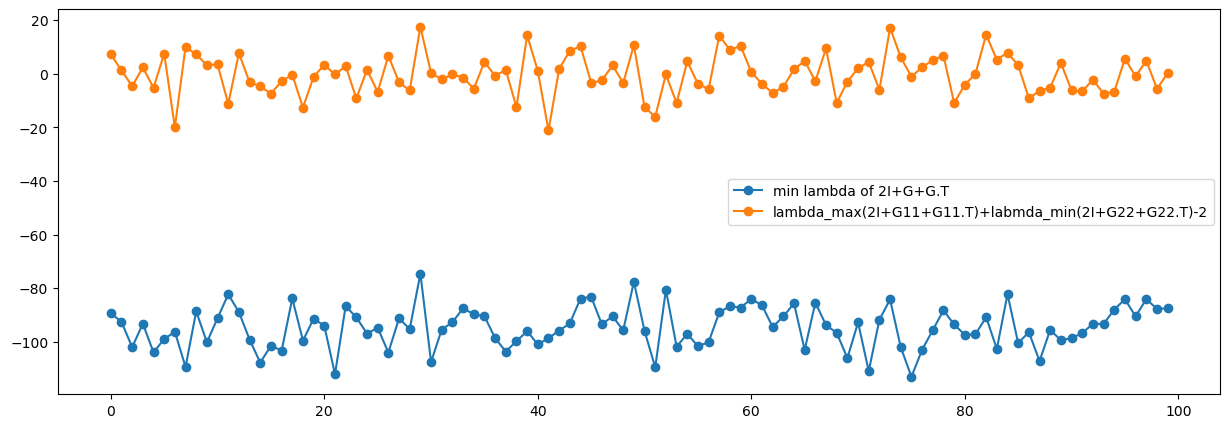

In [7]:
n = 20
min_listt = []
bound_list = []
for i in range(100):
    G11 = np.random.randint(-a,a,(n,n))
    G22 = np.random.randint(-a,a,(n,n))
    lambda_1 = eigenvalues(2*np.identity(n)+G11+G11.T)
    lambda_2 = eigenvalues(2*np.identity(n)+G22+G22.T)
    lambda_sum = eigenvalues(2*np.identity(n)+G11+G11.T+G22+G22.T)
    bound_list.append(max(lambda_1)+min(lambda_2)-2)
    min_listt.append(min(lambda_sum))

plt.figure(figsize=(15,5))
plt.plot(min_listt, 'o-', label='min lambda of 2I+G+G.T')
plt.plot(bound_list, 'o-', label='lambda_max(2I+G11+G11.T)+labmda_min(2I+G22+G22.T)-2')
plt.legend()
plt.show()

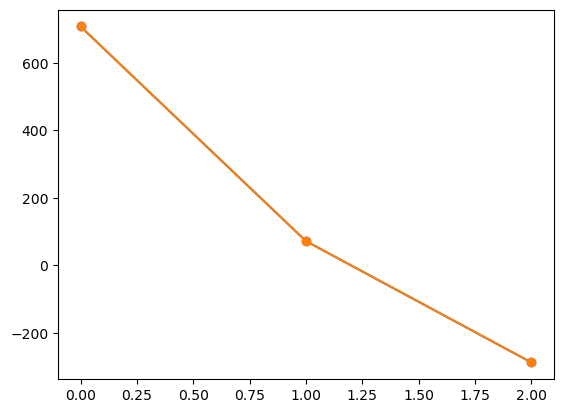

In [24]:
M = np.random.randint(-100,100,(3,3))
A = M+M.T
lambda_A = eigenvalues(A)
lambda_sum = eigenvalues(A+A.T)
plt.plot(2*lambda_A, 'o-', label='2 * eigenvalues of A')
plt.plot(lambda_sum, 'o-', label='eigenvalues of A+A.T')

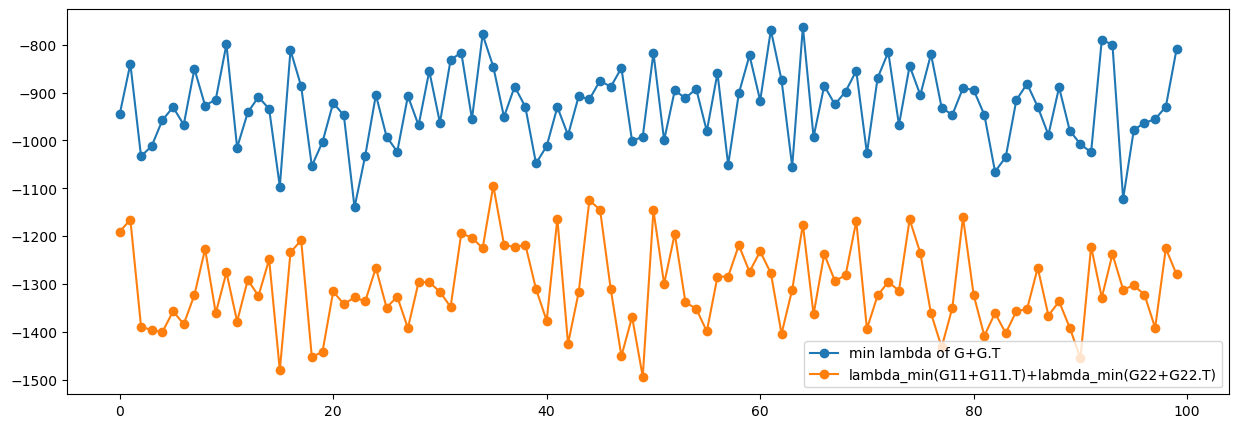

In [36]:
n = 20
a = 100
min_listt = []
bound_list = []
for i in range(100):
    G11 = np.random.randint(-a,a,(n,n))
    G22 = np.random.randint(-a,a,(n,n))
    lambda_1 = eigenvalues(G11+G11.T)
    lambda_2 = eigenvalues(G22+G22.T)
    lambda_sum = eigenvalues(G11+G11.T+G22+G22.T)
    bound_list.append(min(lambda_1)+min(lambda_2))
    min_listt.append(min(lambda_sum))

plt.figure(figsize=(15,5))
plt.plot(min_listt, 'o-', label='min lambda of G+G.T')
plt.plot(bound_list, 'o-', label='lambda_min(G11+G11.T)+labmda_min(G22+G22.T)')
plt.legend()
plt.show()

Critical aplhas are:  -0.9297464873243662 1.0627531376568826


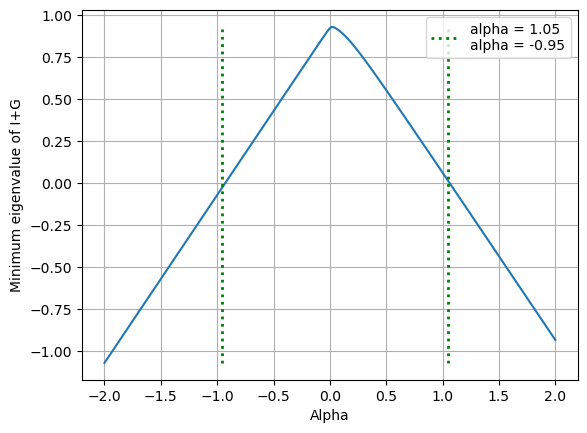

In [3]:
import numpy as np
import matplotlib.pyplot as plt
min_eigval = []
alphas = np.linspace(-2, 2, 20000)
pd_alphas = []
eps = 0.0001
for alpha in alphas:
    matrix = np.array([[1, -0.05, alpha-0.07], [-0.05, 1, 0.07], [alpha-0.07, 0.07, 1]])
    eigvals = np.linalg.eigvals(matrix)
    min_eigval.append(np.min(eigvals))
    if (-eps <= np.min(eigvals) <= eps):
        pd_alphas.append(alpha)

# Plotting
print('Critical aplhas are: ', np.min(pd_alphas), np.max(pd_alphas))
ymin = np.min(min_eigval)
ymax = np.max(min_eigval)
plt.plot(alphas, min_eigval)
plt.xlabel('Alpha')
plt.ylabel('Minimum eigenvalue of I+G')
# plt.title('Minimum Eigenvalue of I+G vs. Alpha')
plt.grid(True)
plt.vlines(x=1.05, ymin=ymin, ymax=ymax, colors='green', ls=':', lw=2, label='alpha = 1.05\nalpha = -0.95')
plt.vlines(x=-0.955, ymin=ymin, ymax=ymax, colors='green', ls=':', lw=2)
plt.legend(loc='upper right')
plt.show()